# 1) Create an EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../../Assignments/Linear_regression/dataset_2/NFLX.csv')

In [3]:
df.head()

Date      Open      High       Low     Close  Adj Close     Volume
0  2002-05-23  1.156429  1.242857  1.145714  1.196429   1.196429  104790000
1  2002-05-24  1.214286  1.225000  1.197143  1.210000   1.210000   11104800
2  2002-05-28  1.213571  1.232143  1.157143  1.157143   1.157143    6609400
3  2002-05-29  1.164286  1.164286  1.085714  1.103571   1.103571    6757800
4  2002-05-30  1.107857  1.107857  1.071429  1.071429   1.071429   10154200

In [4]:
df.describe()

Open         High          Low        Close    Adj Close  \
count  4581.000000  4581.000000  4581.000000  4581.000000  4581.000000   
mean     78.031471    79.285690    76.736079    78.072056    78.072056   
std     118.372084   120.276839   116.376768   118.435303   118.435303   
min       0.377857     0.410714     0.346429     0.372857     0.372857   
25%       3.778571     3.857143     3.685714     3.784286     3.784286   
50%      15.392858    15.671429    14.970000    15.324286    15.324286   
75%      97.830002    99.529999    96.760002    97.889999    97.889999   
max     567.979980   575.369995   520.960022   548.729980   548.729980   

             Volume  
count  4.581000e+03  
mean   1.760516e+07  
std    1.971130e+07  
min    2.856000e+05  
25%    6.908900e+06  
50%    1.155350e+07  
75%    2.113440e+07  
max    3.234140e+08

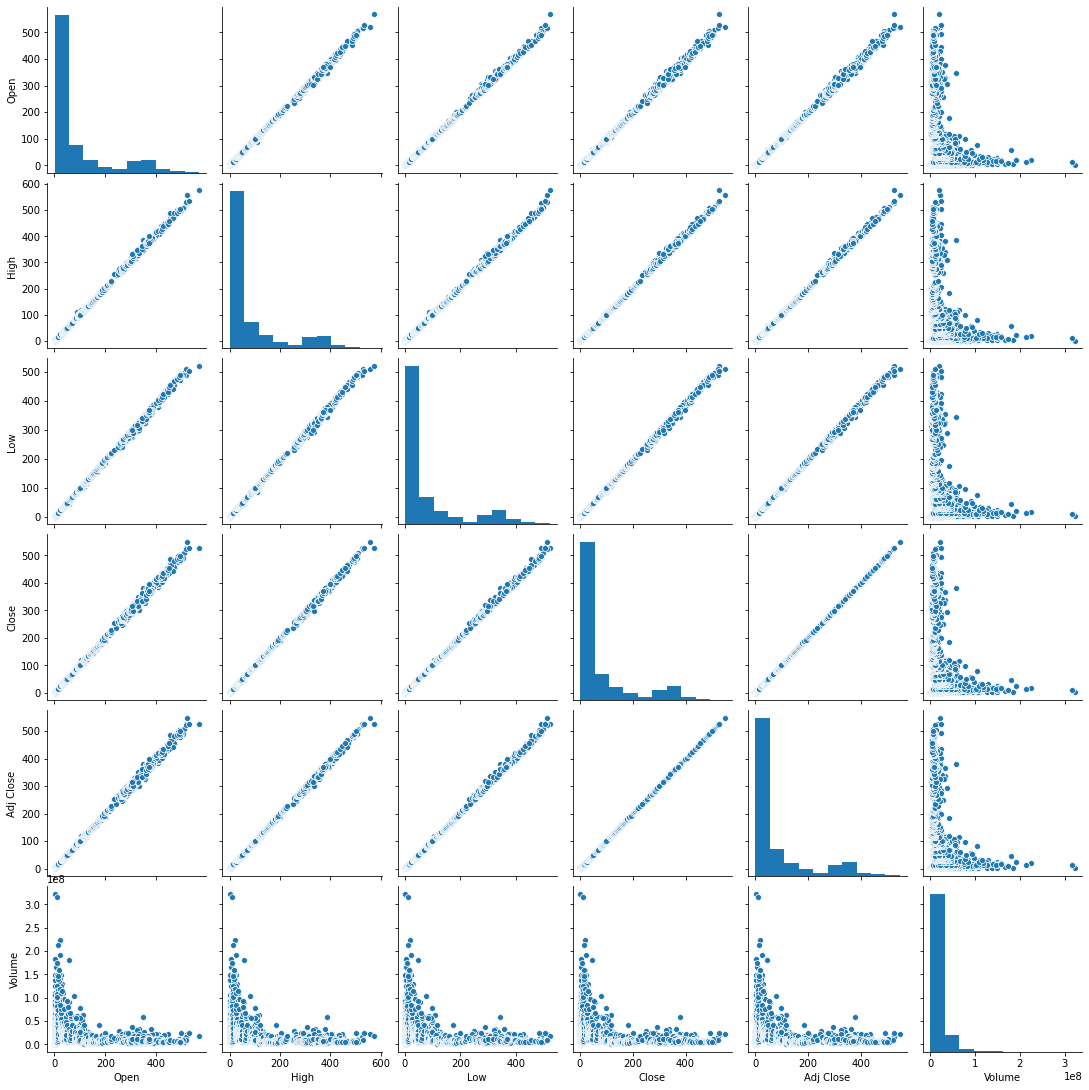

In [5]:
sns.pairplot(df)

# 2) Create an co-relation map

In [47]:
df.corr()

Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999841  0.999830  0.999654   0.999654 -0.193770
High       0.999841  1.000000  0.999783  0.999840   0.999840 -0.192107
Low        0.999830  0.999783  1.000000  0.999834   0.999834 -0.195478
Close      0.999654  0.999840  0.999834  1.000000   1.000000 -0.193671
Adj Close  0.999654  0.999840  0.999834  1.000000   1.000000 -0.193671
Volume    -0.193770 -0.192107 -0.195478 -0.193671  -0.193671  1.000000

<AxesSubplot:>

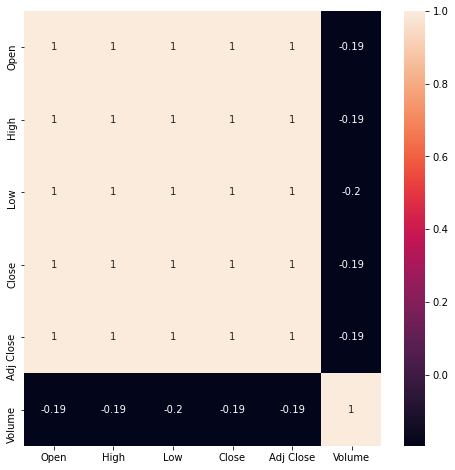

In [6]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)

# 3) Predict the no:of stocks cleared on a particular day

In [7]:
cor = df.corr()
cor_target = abs(cor["Open"])
relevant_features = cor_target[cor_target>0.5]
relevant_features


Open         1.000000
High         0.999841
Low          0.999830
Close        0.999654
Adj Close    0.999654
Name: Open, dtype: float64

In [8]:
X = df[['High','Low','Close','Adj Close','Volume']]



In [9]:
X

High         Low       Close   Adj Close     Volume
0       1.242857    1.145714    1.196429    1.196429  104790000
1       1.225000    1.197143    1.210000    1.210000   11104800
2       1.232143    1.157143    1.157143    1.157143    6609400
3       1.164286    1.085714    1.103571    1.103571    6757800
4       1.107857    1.071429    1.071429    1.071429   10154200
...          ...         ...         ...         ...        ...
4576  497.790009  487.760010  488.510010  488.510010    5986700
4577  494.920013  484.130005  484.480011  484.480011    6611800
4578  488.350006  477.510010  485.799988  485.799988    6608600
4579  494.799988  484.500000  488.880005  488.880005    5924300
4580  503.089996  490.230011  498.619995  498.619995    5873100

[4581 rows x 5 columns]

In [10]:
y = df['Open']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
from sklearn.linear_model import LinearRegression


In [11]:
y

0         1.156429
1         1.214286
2         1.213571
3         1.164286
4         1.107857
           ...    
4576    496.019989
4577    492.250000
4578    480.709991
4579    488.290009
4580    490.859985
Name: Open, Length: 4581, dtype: float64

In [12]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [13]:
predictions= lm.predict(X_test)

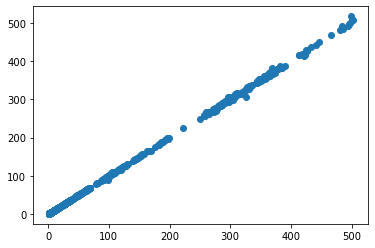

In [14]:
plt.scatter(predictions,y_test)

In [15]:
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff']) #Printing the coefficients of the Feature varibales
cdf

Coeff
High       8.375477e-01
Low        7.805355e-01
Close     -3.092914e-01
Adj Close -3.092914e-01
Volume    -2.395653e-10

In [16]:
h=float(input("Enter high?"))
hi= h*lm.coef_[0]

Enter high?9


In [17]:
l=float(input("Enter low?"))
lo= l*lm.coef_[1]

Enter low?1


In [18]:
c=float(input("Enter close?"))
close= c*lm.coef_[2]

Enter close?6


In [19]:
a=float(input("Enter adj close?"))
adcl= a*lm.coef_[3]

Enter adj close?6


In [20]:
v=float(input("Enter volume?"))
vo= v*lm.coef_[4]

Enter volume?4


In [21]:
noofstocks=(lm.intercept_+hi+lo+close+adcl+vo)
print("Estimated price is {} " .format(noofstocks))

Estimated price is 4.622295574702333 


# 4) Plot training accuracy and testing accuracy

In [22]:
from sklearn.metrics import accuracy_score

In [35]:
test_acc = lm.score(X_test, y_test)

In [36]:
print(test_acc)

0.9998054848446434


In [37]:
train_acc = lm.score(X_train, y_train)

In [38]:
print(train_acc)

0.9998655015911746


# 6) Find out if the model is over-fitting


In [27]:
print(test_acc)

0.9998054848446434


In [28]:
print(train_acc)

0.9998655015911746


# 7) implement k-fold cross validation

In [39]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [48]:
model = []
model.append(('LR',LogisticRegression()))
model.append(('RF',RandomForestClassifier()))
model.append(('KNN',KNeighborsClassifier()))
model.append(('SVC',SVC()))

In [49]:
from sklearn.model_selection import KFold

In [50]:
from sklearn.metrics import f1_score,accuracy_score,roc_curve,auc


In [51]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [52]:
for mod,clf in model:
    scores = cross_val_score(mod,X,y,scoring = 'accuracy',cv = cv)
    print("Model is %s and Score %f"%(mod,scores.mean()))

TypeError: estimator should be an estimator implementing 'fit' method, 'LR' was passed